<a href="https://colab.research.google.com/github/Charee-Villapong/charee-villapong/blob/master/forecast_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pandasのimport
import pandas as pd
# ツイートのCSVデータの読み込み
df = pd.read_csv("/content/drive/MyDrive/NoCode_2020-05-28-23-25.csv")
# fbprophetのimport
!pip install pystan
!pip install fbprophet
!pip install plotly
from fbprophet import Prophet


In [ ]:
# 最初の5行を取得
df.head()
# 行数・列数を取得
#df.shape

,Unnamed: 0,ユーザー名,ユーザーid,RT数,いいね数,日時,本文
0,0,_NoCode,1266008783542800385,0,3,2020-05-28 23:09:49,Thanks to everyone that tuned in to our @ BAFT...
1,1,YaronMSK,1266008092443107328,0,1,2020-05-28 23:07:05,Thanks @ _NoCode and @ BAFTAGames for this ins...
2,2,cpdis,1266008019768274946,0,1,2020-05-28 23:06:47,@ webflow because I wanted to learn what this ...
3,3,nocodedevs,1266007968853655554,0,1,2020-05-28 23:06:35,Check out NoCodery ( @ nocodery)'s latest # no...
4,4,DanielDiggle,1266007553730916352,3,3,2020-05-28 23:04:56,Knights vs Goblins Assets starting to come tog...


In [71]:
# データの整形
# 日時といいね数の列を取り出して新しいDataFrameを作る。
df = df.loc[:,["日時","いいね数"]]


In [72]:
# 日時をdatetime型にする
df['日時'] = pd.to_datetime(df['日時'])

In [73]:
#　日付が同じデータを足してまとめる
df = df.resample("D", on="日時").sum()
df.head()

,いいね数
日時,
2020-04-16,1058.0
2020-04-17,939.0
2020-04-18,1243.0
2020-04-19,1125.0
2020-04-20,1049.0


In [74]:
# 通常の0から始まるindexを追加
df = df.reset_index()
df.head()

,日時,いいね数
0,2020-04-16,1058.0
1,2020-04-17,939.0
2,2020-04-18,1243.0
3,2020-04-19,1125.0
4,2020-04-20,1049.0


In [78]:
# prophetの予測のために、dsとyをカラム名に設定
df = df.rename(columns={'日時':'ds','いいね数':'y'})
df.head()

,ds,y
0,2020-04-16,1058.0
1,2020-04-17,939.0
2,2020-04-18,1243.0
3,2020-04-19,1125.0
4,2020-04-20,1049.0


In [80]:
# protphetのインスタンスを作成
m = Prophet()

In [81]:
# データを元に学習
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
# 予測する分のデータフレームの作成
future = m.make_future_dataframe(periods = 60)
# 後ろから5行を表示
future.tail()

,ds
98,2020-07-23
99,2020-07-24
100,2020-07-25
101,2020-07-26
102,2020-07-27


In [84]:
# 予測する
forecast = m.predict(future)

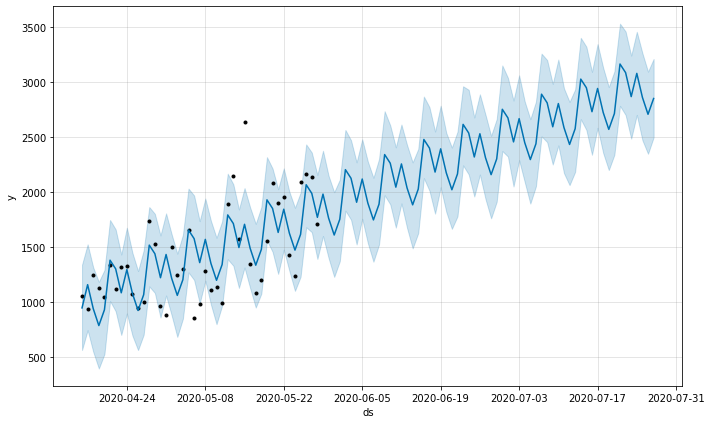

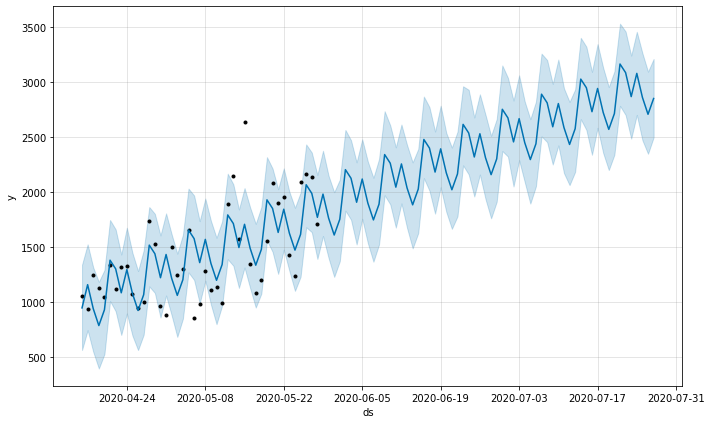

In [86]:
# 予測データの描画
m.plot(forecast)

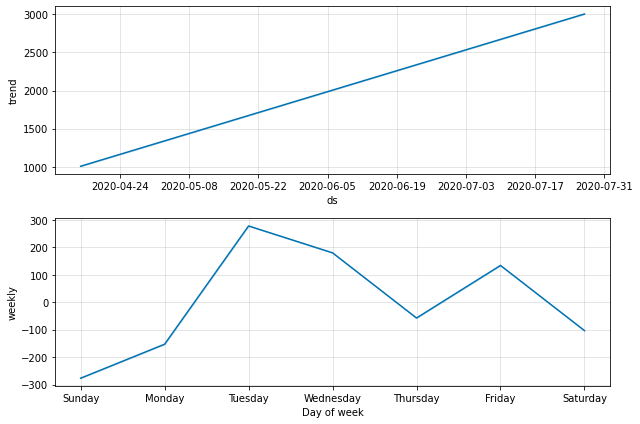

In [88]:
# 予測データのトレンドや周期性を描画
fig2 = m.plot_components(forecast)

In [99]:
# plotlyのimport
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [100]:
# 予測データをインタラクティブに描画
fig1 = plot_plotly(m, forecast)
py.plot(fig1)

'temp-plot.html'